# Count features extraction

Count feature is the number of annotations made so far.<br>
It was computed for each timestamp/frame and extracted for various annotation types.

In [3]:
import glob
import pympi
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_folder = f'/home/janko/Desktop/social-dining/data'

annotations_folder = f'{data_folder}/annotation/annotation-files'
videos_folder = f'{data_folder}/raw/video'

count_features_folder =  f'{data_folder}/processed/count-features'

# Frame rate of count features
FPS = 30.
DT = 1 / FPS


In [4]:
annotation_types = [
    'food_lifted',
    'food_to_mouth'
]

plot_data = []
for annotation_file in glob.glob(f'{annotations_folder}/*.eaf'):
    eaf_obj1 = pympi.Elan.Eaf(annotation_file)
    video_id = annotation_file.split('/')[-1].split('.')[0]
    video_data = cv2.VideoCapture(f'{videos_folder}/{video_id}.mp4')
    total_num_frames = video_data.get(cv2.CAP_PROP_FRAME_COUNT)

    for annotation_type in annotation_types:
        annotations = sorted(eaf_obj1.get_annotation_data_for_tier(annotation_type), key=lambda x: x[0])

        t = 0.
        cnt = 0
        annotation_counts = []

        while len(annotation_counts) < int(total_num_frames):
            # Reached next annotation
            if cnt < len(annotations) and t >= annotations[cnt][0] / 1000.:
                cnt += 1
            annotation_counts.append(cnt)
            t += DT

        timestamps = np.arange(len(annotation_counts)) * DT

        # Log data for visualization
        if video_id == '01_3':
            plot_data.append( (timestamps / 60., annotation_counts, f"{annotation_type}") )

        # Save count features as .csv file, one per video
        pd.DataFrame({
            'Timestamp (s)': timestamps,
            f'Number of {annotation_type} annotations': annotation_counts
        }).to_csv(f"{count_features_folder}/count-{annotation_type.replace('_', '-')}/{video_id}.csv", index=False)


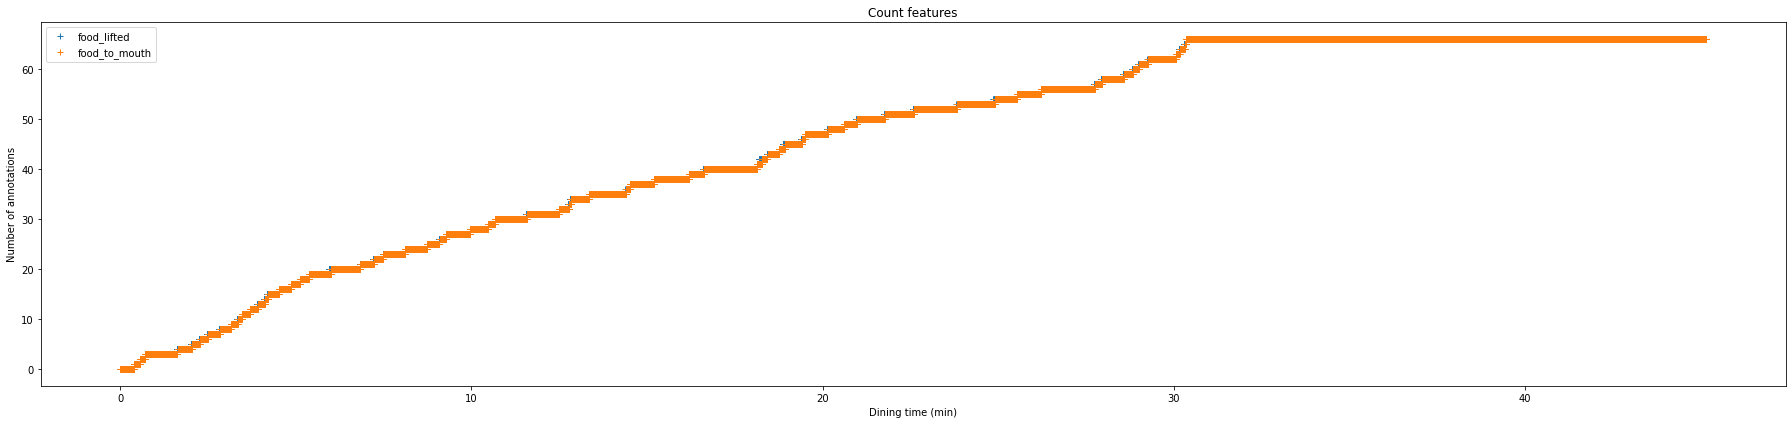

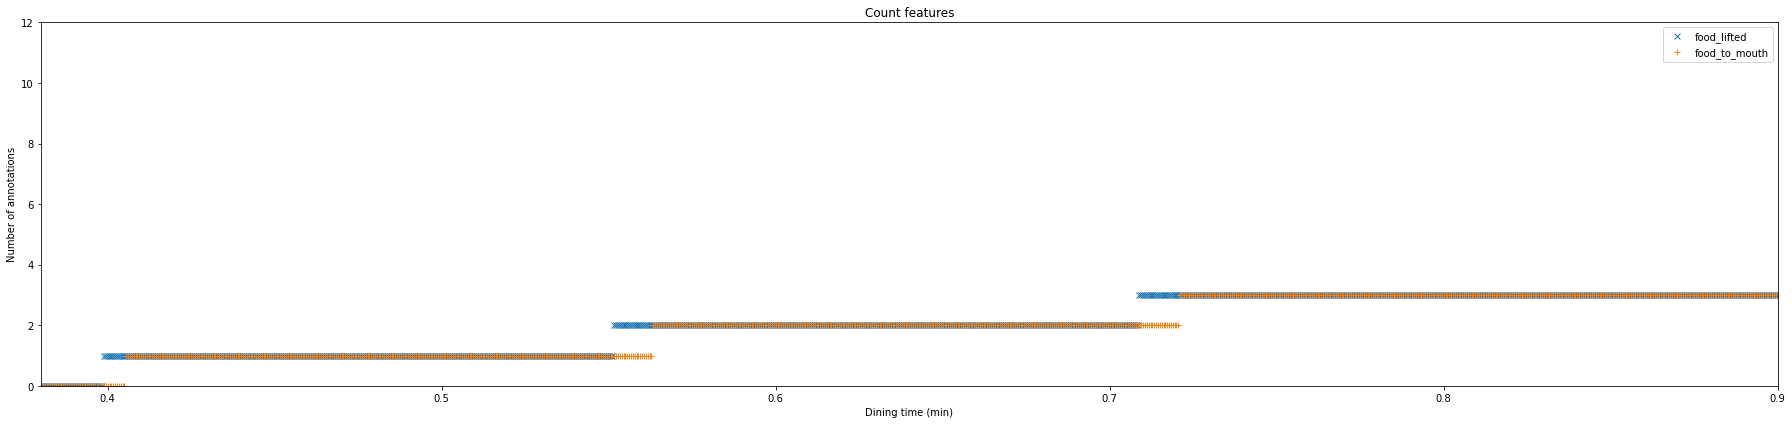

In [11]:
plt.figure(figsize=(25, 6))
for x, y, label in plot_data:
    plt.plot(x, y, '+', label=label)
plt.xlabel('Dining time (min)')
plt.ylabel(f'Number of annotations')
plt.title(f"Count features")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 6))
for (x, y, label), marker in zip(plot_data, ['x', '+']):
    plt.plot(x, y, marker, label=label)
plt.xlim(0.38, 0.9)
plt.ylim(0, 12)
plt.xlabel('Dining time (min)')
plt.ylabel(f'Number of annotations')
plt.title(f"Count features")
plt.legend()
plt.tight_layout()
plt.show()
